In [1]:
import tensorflow as tf
print(f"Tensor Flow Version: {tf.__version__}")

Tensor Flow Version: 2.10.1


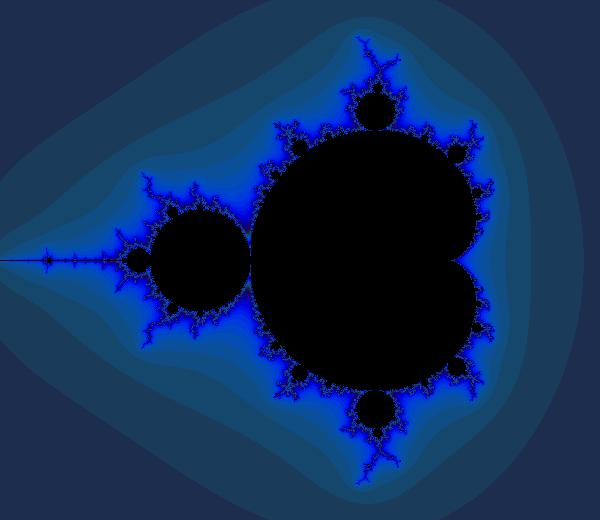

In [4]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image,display

def DisplayFractal (a,fmt='jpeg'):
    """Display an array of iteration counts as a 
    colorful picture of a fractal."""
    a_cyclic=(6.28*a/20.0).reshape(list(a.shape)+[1])
    img=np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)],2)
    img[a==a.max()]=0
    a=img
    a=np.uint8(np.clip(a,0,255))
    f=BytesIO()
    PIL.Image.fromarray(a).save(f,fmt)
    display(Image(data=f.getvalue()))

Y,X=np.mgrid[-1.3:1.3:0.005,-2:1:0.005]
Z=X+1j*Y

xs=tf.constant(Z.astype(np.complex64))
zs=tf.Variable(xs)
ns=tf.Variable(tf.zeros_like(xs,tf.float32))

for i in range (200):
    zs_=zs*zs+xs
    not_diverged=tf.abs(zs_)<4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged,tf.float32))

DisplayFractal(ns.numpy())



In [5]:
import tensorflow as tf
matrix1=tf.constant([[3.,3.]])

matrix2=tf.constant([[2.],[2.]])

product=tf.matmul(matrix1,matrix2)

print(product)
print(float(product))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


In [9]:
import tensorflow as tf
x=tf.Variable([1.0,2.0])
a=tf.constant([3.0,3.0])

sub=tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


In [10]:
x.assign([4.0,6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [11]:
sub=tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


In [31]:
from keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df=pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
               na_values=['NA','?'])

cars=df['name']

df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

x=df[[ 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values
y=df['mpg'].values



In [26]:
import keras.models as models

In [27]:
# Build the neural network
model = models.Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 - 1s - 83ms/step - loss: 38162.4023
Epoch 2/100
13/13 - 0s - 5ms/step - loss: 4070.6174
Epoch 3/100
13/13 - 0s - 4ms/step - loss: 304.6751
Epoch 4/100
13/13 - 0s - 4ms/step - loss: 592.8732
Epoch 5/100
13/13 - 0s - 4ms/step - loss: 600.1481
Epoch 6/100
13/13 - 0s - 4ms/step - loss: 550.0932
Epoch 7/100
13/13 - 0s - 4ms/step - loss: 296.1603
Epoch 8/100
13/13 - 0s - 5ms/step - loss: 136.2741
Epoch 9/100
13/13 - 0s - 4ms/step - loss: 141.3675
Epoch 10/100
13/13 - 0s - 4ms/step - loss: 126.0414
Epoch 11/100
13/13 - 0s - 4ms/step - loss: 123.6520
Epoch 12/100
13/13 - 0s - 4ms/step - loss: 121.9471
Epoch 13/100
13/13 - 0s - 5ms/step - loss: 120.4971
Epoch 14/100
13/13 - 0s - 5ms/step - loss: 118.5630
Epoch 15/100
13/13 - 0s - 7ms/step - loss: 116.9654
Epoch 16/100
13/13 - 0s - 6ms/step - loss: 115.7607
Epoch 17/100
13/13 - 0s - 5ms/step - loss: 113.6513
Epoch 18/100
13/13 - 0s - 5ms/step - loss: 112.3869
Epoch 19/100
13/13 - 0s - 5ms/step - loss: 110.4594
Epoch 20/100
13/13 - 0s - 5ms

In [28]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Shape: (398, 1)
[[14.981424]
 [17.412912]
 [17.904417]
 [19.245497]
 [17.420288]
 [15.30382 ]
 [17.175282]
 [17.564108]
 [17.963602]
 [18.158525]]


In [29]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 5.652627105214372


In [32]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, " 
          + f"predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: [14.981424]
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: [17.412912]
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: [17.904417]
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: [19.245497]
5. Car name: ford torino, MPG: 17.0, predicted MPG: [17.420288]
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: [15.30382]
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: [17.175282]
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: [17.564108]
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: [17.963602]
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: [18.158525]
